# Załadowanie danych

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Załaduj dane MNIST
mnist = tf.keras.datasets.mnist


# Obejrzenie danych

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


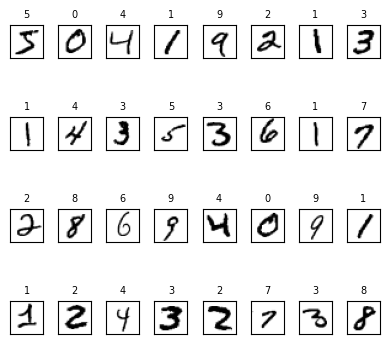

In [123]:
fig, axs = plt.subplots(4, 8, figsize=(4, 4))

# Wyświetlanie obrazów na każdym subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap='binary')  
    ax.xaxis.label.set_size(3)  
    ax.set_title(f"{y_train[i]}", fontsize=7) 
    ax.set_xticks([])  # Ukrycie znaczników osi X
    ax.set_yticks([])  # Ukrycie znaczników osi Y


# Optymalizacja układu
plt.tight_layout()
plt.show()




In [213]:
unique, counts = np.unique(y_train, return_counts=True)

# Wyświetl wyniki
for label, count in zip(unique, counts):
    print(f"Etykieta {label}: {count/600:.2f}%")

Etykieta 0: 9.87%
Etykieta 1: 11.24%
Etykieta 2: 9.93%
Etykieta 3: 10.22%
Etykieta 4: 9.74%
Etykieta 5: 9.04%
Etykieta 6: 9.86%
Etykieta 7: 10.44%
Etykieta 8: 9.75%
Etykieta 9: 9.91%


# PCA

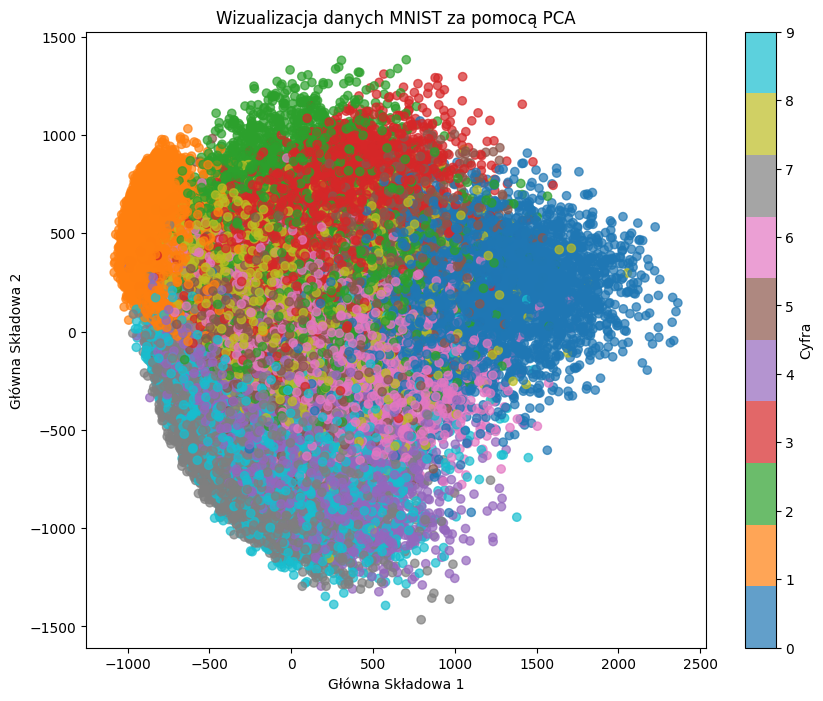

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# Załaduj dane MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Przekształcenie obrazów do jednowymiarowej formy
x_train_flat = x_train.reshape((60000, 28 * 28))
x_test_flat = x_test.reshape((10000, 28 * 28))

# Redukcja wymiarów do 2D za pomocą PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_flat)

# Wizualizacja 2D dla danych treningowych
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Cyfra")
plt.title("Wizualizacja danych MNIST za pomocą PCA")
plt.xlabel("Główna Składowa 1")
plt.ylabel("Główna Składowa 2")
plt.show()


# Odpalenie KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Konwersja do przedziału [0; 1)
x_train_knn = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test_knn = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

# Tworzenie modelu KNN
knn = KNeighborsClassifier(n_neighbors=3)  

# Trenowanie modelu KNN
knn.fit(x_train_knn, y_train)

# Przewidywanie na danych testowych
y_pred = knn.predict(x_test_knn)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu KNN na zbiorze testowym: {accuracy * 100:.2f}%")



Dokładność modelu KNN na zbiorze testowym: 97.05%


## Przegląd k i metryk

In [109]:
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Trenowanie modelu KNN
    knn.fit(x_train_knn, y_train)
    
    # Przewidywanie na danych testowych
    y_pred = knn.predict(x_test_knn)
    
    # Ocena modelu
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Ilość sąsiadów {k}, dokładność {accuracy * 100:.2f}%")


Ilość sąsiadów 1, dokładność 96.91%
Ilość sąsiadów 2, dokładność 96.27%
Ilość sąsiadów 3, dokładność 97.05%
Ilość sąsiadów 4, dokładność 96.82%
Ilość sąsiadów 5, dokładność 96.88%
Ilość sąsiadów 6, dokładność 96.77%
Ilość sąsiadów 7, dokładność 96.94%
Ilość sąsiadów 8, dokładność 96.70%
Ilość sąsiadów 9, dokładność 96.59%
Ilość sąsiadów 10, dokładność 96.65%
Ilość sąsiadów 11, dokładność 96.68%
Ilość sąsiadów 12, dokładność 96.61%
Ilość sąsiadów 13, dokładność 96.53%
Ilość sąsiadów 14, dokładność 96.40%
Ilość sąsiadów 15, dokładność 96.33%
Ilość sąsiadów 16, dokładność 96.32%
Ilość sąsiadów 17, dokładność 96.30%
Ilość sąsiadów 18, dokładność 96.33%
Ilość sąsiadów 19, dokładność 96.32%
Ilość sąsiadów 20, dokładność 96.25%
Ilość sąsiadów 21, dokładność 96.30%
Ilość sąsiadów 22, dokładność 96.18%
Ilość sąsiadów 23, dokładność 96.19%
Ilość sąsiadów 24, dokładność 96.08%
Ilość sąsiadów 25, dokładność 96.09%
Ilość sąsiadów 26, dokładność 96.12%
Ilość sąsiadów 27, dokładność 96.04%
Ilość sąsi

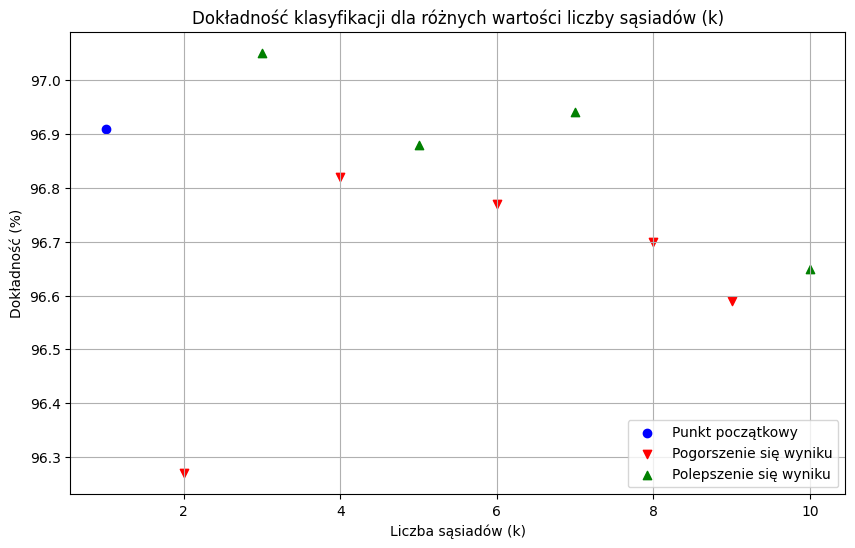

In [2]:
import matplotlib.pyplot as plt

# Dane
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy = [96.91, 96.27, 97.05, 96.82, 96.88, 96.77, 96.94, 96.70, 96.59, 96.65]

# Ustalanie kolorów i kształtów punktów w zależności od tego, czy dokładność się zwiększa, czy zmniejsza
colors = []
markers = []
for i in range(1, len(accuracy)):
    if accuracy[i] > accuracy[i-1]:
        colors.append('green')
        markers.append('^')  # Zielony trójkąt do góry, gdy wynik się polepsza
    else:
        colors.append('red')
        markers.append('v')  # Czerwony trójkąt w dół, gdy wynik się pogarsza

# Rysowanie wykresu scatter
plt.figure(figsize=(10, 6))

# Pierwszy punkt (k=1) jako odniesienie
plt.scatter(neighbors[0], accuracy[0], color='blue', marker='o', label='Start (k=1)')

# Dodanie reszty punktów z odpowiednimi kolorami i markerami
for i in range(1, len(neighbors)):
    plt.scatter(neighbors[i], accuracy[i], color=colors[i-1], marker=markers[i-1])

# Opis osi i tytuł
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Dokładność (%)")
plt.title("Dokładność klasyfikacji dla różnych wartości liczby sąsiadów (k)")
plt.legend(["Punkt początkowy", "Pogorszenie się wyniku", "Polepszenie się wyniku"], loc="lower right")

plt.grid(True)
plt.show()


# Jak działa model KNN

[1]


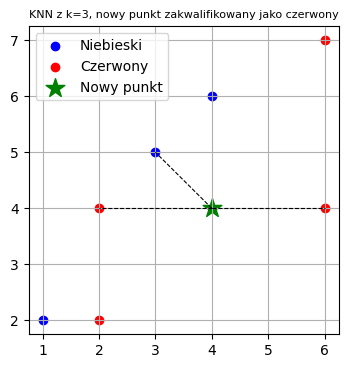

In [308]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Dane treningowe i etykiety
x_train = np.array([[1, 2], [2, 2], [6, 4], [6, 7], [2, 4], [3, 5], [4, 6]])
y_train = np.array([0, 1, 1, 1, 1, 0, 0])  # Etykiety: niebieski lub czerowny



# Nowy punkt do przewidzenia
new_point = np.array([[4, 4]])

# Tworzymy i trenujemy model KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
prediction = knn.predict(new_point)
print(prediction)

# Wykres
plt.figure(figsize=(4, 4))
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], color='blue', label='Niebieski')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='red', label='Czerwony')
plt.scatter(new_point[:, 0], new_point[:, 1], color='green', marker='*', s=200, label='Nowy punkt')
plt.legend()

# Linie od nowego punktu do najbliższych sąsiadów
distances, indices = knn.kneighbors(new_point)
for i in indices[0]:
    plt.plot([new_point[0, 0], x_train[i, 0]], [new_point[0, 1], x_train[i, 1]], 'k--', linewidth=0.8)

color_label = "czerwony" if prediction[0] == 1 else "niebieski"
plt.title(f"KNN z k={k}, nowy punkt zakwalifikowany jako {color_label}", fontsize=8)
plt.grid(True)
plt.show()


## Metryki KNN

In [ ]:
from sklearn.neighbors import kneighbors_graph

# Macierz sąsiedztwa dla zbioru treningowego
knn_graph = kneighbors_graph(x_train, n_neighbors=3, mode='distance').toarray()
knn_graph

# Zapisywanie i odczytywanie modelu

In [110]:
import pickle

# Zapisz model do pliku
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [111]:
# Wczytaj model z pliku
with open('knn_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)

# Użyj modelu do przewidywań
y_pred = knn_loaded.predict(x_test_knn)
print(y_pred)

[7 2 1 ... 4 5 6]


In [183]:
accuracy_score(y_test, y_pred)


0.9705

In [117]:
img = [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,  253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,  253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,  253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,  205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,  190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,  253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,  241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,  148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,  253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,  253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,  195, 80,  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]

# Błędnie zaklasyfikowane

In [8]:
incorrect_indices = np.where(y_pred != y_test)[0]

print(incorrect_indices.shape)

(295,)


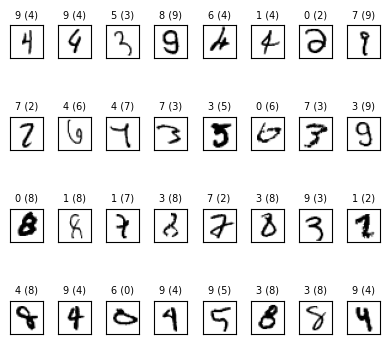

In [45]:
import numpy as np
import matplotlib.pyplot as plt


# Znajdź indeksy błędnie zaklasyfikowanych obrazków
incorrect_indices = np.where(y_pred != y_test)[0]

# Liczba przykładów
num_examples = 32

# Rozmiar wykresów
fig, axs = plt.subplots(4, 8, figsize=(4, 4))

# Wyświetlamy błędnie zaklasyfikowane
for i, ax in enumerate(axs.flat[:num_examples]):
    idx = incorrect_indices[i]
    ax.imshow(x_test[idx], cmap='binary')
    ax.xaxis.label.set_size(3)  
    ax.set_title(f"{y_pred[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  # Hide X-axis ticks
    ax.set_yticks([])  # Hide Y-axis ticks

# Zoptymalizuj układ
plt.tight_layout()
plt.show()


# Macierz pomyłek

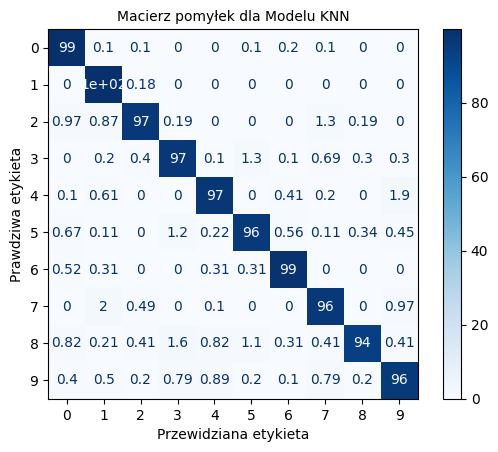

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Oblicz macierz pomyłek
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm = np.round(100*cm, 2)

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Macierz pomyłek dla Modelu KNN", fontsize=10)

# Etykiety osi
plt.xlabel("Przewidziana etykieta")
plt.ylabel("Prawdziwa etykieta")

plt.show()

In [13]:
np.round(cm, 4)

array([[0.9939, 0.001 , 0.001 , 0.    , 0.    , 0.001 , 0.002 , 0.001 ,
        0.    , 0.    ],
       [0.    , 0.9982, 0.0018, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.0097, 0.0087, 0.9651, 0.0019, 0.    , 0.    , 0.    , 0.0126,
        0.0019, 0.    ],
       [0.    , 0.002 , 0.004 , 0.9663, 0.001 , 0.0129, 0.001 , 0.0069,
        0.003 , 0.003 ],
       [0.001 , 0.0061, 0.    , 0.    , 0.9674, 0.    , 0.0041, 0.002 ,
        0.    , 0.0193],
       [0.0067, 0.0011, 0.    , 0.0123, 0.0022, 0.963 , 0.0056, 0.0011,
        0.0034, 0.0045],
       [0.0052, 0.0031, 0.    , 0.    , 0.0031, 0.0031, 0.9854, 0.    ,
        0.    , 0.    ],
       [0.    , 0.0204, 0.0049, 0.    , 0.001 , 0.    , 0.    , 0.964 ,
        0.    , 0.0097],
       [0.0082, 0.0021, 0.0041, 0.0164, 0.0082, 0.0113, 0.0031, 0.0041,
        0.9384, 0.0041],
       [0.004 , 0.005 , 0.002 , 0.0079, 0.0089, 0.002 , 0.001 , 0.0079,
        0.002 , 0.9594]])

In [93]:
# Wybierz pojedynczy obraz do testu, np. pierwszy obraz z zestawu testowego
image_index = 0  # Możesz zmienić na inny indeks
image = x_test[image_index]
true_label = y_test[image_index]

# Przekształć obraz do formatu jednowymiarowego i normalizuj
image_flat = image.reshape(1, 28 * 28).astype('float32') / 255

# Przewidywanie na podstawie obrazu
predicted_label = knn.predict(image_flat)

print(f"Prawdziwa etykieta: {true_label}")
print(f"Przewidywana etykieta: {predicted_label[0]}")

Prawdziwa etykieta: 7
Przewidywana etykieta: 7


## Błędnie zaklasyfikowane trójki

[ 582  591  839  844 1319 1813 1878 2177 2393 2430 3206 3662 4075 4724
 4890 7545]


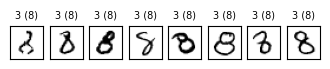

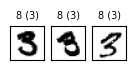

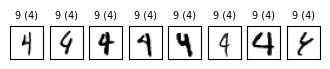

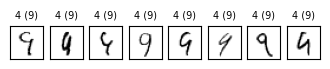

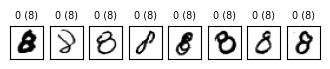

In [72]:
# Znalezienie indeksów błędnych klasyfikacji, gdzie prawdziwa etykieta to 3, ale przewidziana to 8
misclassified_indices = np.where((y_test == 8) & (y_pred == 3))[0]

print(misclassified_indices)

# Wyświetlenie kilku błędnie zaklasyfikowanych obrazów
fig, axes = plt.subplots(1, min(len(misclassified_indices), 8), figsize=(4, 4))
    
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(x_test[idx], cmap='binary')   
    ax.set_title(f"{y_pred[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  
    ax.set_yticks([])  


misclassified_indices = np.where((y_test == 3) & (y_pred == 8))[0]
# Wyświetlenie kilku błędnie zaklasyfikowanych obrazów
fig, axes = plt.subplots(1, min(len(misclassified_indices), 8), figsize=(1.5, 1.5))
    
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(x_test[idx], cmap='binary')   
    ax.set_title(f"{y_pred[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  
    ax.set_yticks([])  


misclassified_indices = np.where((y_test == 4) & (y_pred == 9))[0]
# Wyświetlenie kilku błędnie zaklasyfikowanych obrazów
fig, axes = plt.subplots(1, min(len(misclassified_indices), 8), figsize=(4, 4))
    
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(x_test[idx], cmap='binary')   
    ax.set_title(f"{y_pred[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  
    ax.set_yticks([])  


misclassified_indices = np.where((y_test == 9) & (y_pred == 4))[0]
# Wyświetlenie kilku błędnie zaklasyfikowanych obrazów
fig, axes = plt.subplots(1, min(len(misclassified_indices), 8), figsize=(4, 4))
    
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(x_test[idx], cmap='binary')   
    ax.set_title(f"{y_pred[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  
    ax.set_yticks([])  


misclassified_indices = np.where((y_test == 8) & (y_pred == 0))[0]
# Wyświetlenie kilku błędnie zaklasyfikowanych obrazów
fig, axes = plt.subplots(1, min(len(misclassified_indices), 8), figsize=(4, 4))
    
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(x_test[idx], cmap='binary')   
    ax.set_title(f"{y_pred[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  
    ax.set_yticks([])  

plt.show()

# Sieć neuronalna

## Import danych - MLP

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Załaduj dane MNIST
mnist = tf.keras.datasets.mnist
(x_full_train, y_full_train), (x_test, y_test) = mnist.load_data()

# Przekształcenie danych do formatu [0, 1]
x_full_train = x_full_train.reshape((60000, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((10000, 28 * 28)).astype("float32") / 255



## Wydzielenie zbioru walidacyjnego - MLP

In [27]:
# Rozdzielenie danych na zbiór treningowy i walidacyjny
x_train, x_valid, y_train, y_valid = train_test_split(
    x_full_train, y_full_train, test_size=0.1, random_state=42
)

# Sprawdzenie rozmiarów zbiorów
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_valid: {x_valid.shape}, y_valid: {y_valid.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (54000, 784), y_train: (54000,)
x_valid: (6000, 784), y_valid: (6000,)
x_test: (10000, 784), y_test: (10000,)


## Budowanie modelu

In [44]:
model_mlp = tf.keras.Sequential()
model_mlp.add(tf.keras.layers.InputLayer(shape=[28*28]))
model_mlp.add(tf.keras.layers.Flatten())
model_mlp.add(tf.keras.layers.Dense(300, activation="relu"))
model_mlp.add(tf.keras.layers.Dense(100, activation="relu"))
model_mlp.add(tf.keras.layers.Dense(10, activation="softmax"))


## Podsumowanie 

In [40]:
model_mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,910 (1.36 MB)

 Trainable params: 356,910 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Kompilowanie modelu

In [41]:
model_mlp.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

## Uczenie

In [42]:
# history_mlp = model_mlp.fit(
#     x_train,  # Dane treningowe (wejścia)
#     y_train,  # Etykiety treningowe
#     epochs=30,  # Liczba epok
#     validation_data=(x_valid, y_valid)  # Dane walidacyjne (wejścia i etykiety)
# )

from tensorflow.keras.callbacks import EarlyStopping

# Utworzenie callbacka EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metryka do monitorowania (np. walidacyjna strata)
    patience=3,          # Liczba epok bez poprawy, po której trening zostanie zatrzymany
    min_delta=0.00001,         # Minimalna poprawa dokładności o 0.1%
    restore_best_weights=True  # Przywrócenie wag z najlepszej epoki
)

# Trening modelu z EarlyStopping
history = model_mlp.fit(
    x_train, y_train,
    epochs=30,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping]  # Dodanie callbacka do fit
)




Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.6932 - loss: 1.1050 - val_accuracy: 0.9135 - val_loss: 0.2966
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9188 - loss: 0.2818 - val_accuracy: 0.9347 - val_loss: 0.2366
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9378 - loss: 0.2153 - val_accuracy: 0.9410 - val_loss: 0.2005
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9456 - loss: 0.1843 - val_accuracy: 0.9505 - val_loss: 0.1683
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.9574 - loss: 0.1490 - val_accuracy: 0.9545 - val_loss: 0.1490
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9627 - loss: 0.1280 - val_accuracy: 0.9583 - val_loss: 0.1427
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.9690 - loss: 0.1059 - val_accuracy: 0.9663 - val_loss: 0.1167
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.9715 -

## Krzywa uczenia

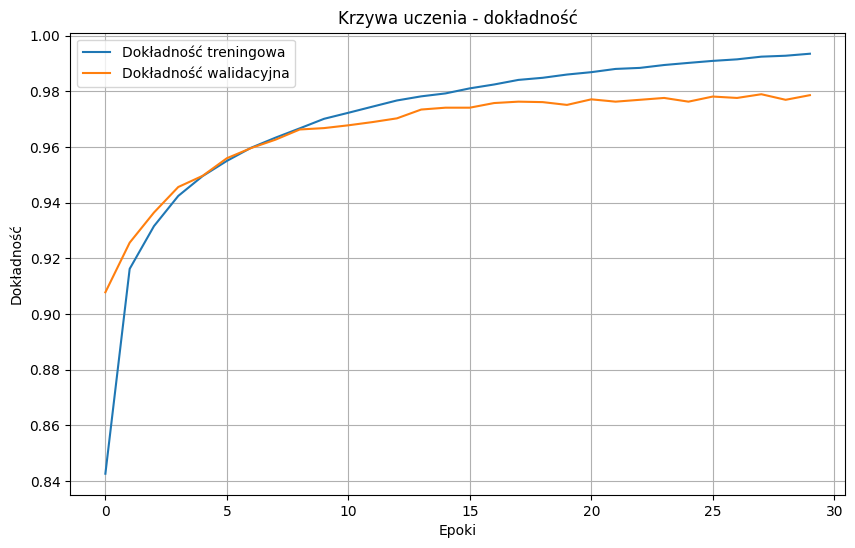

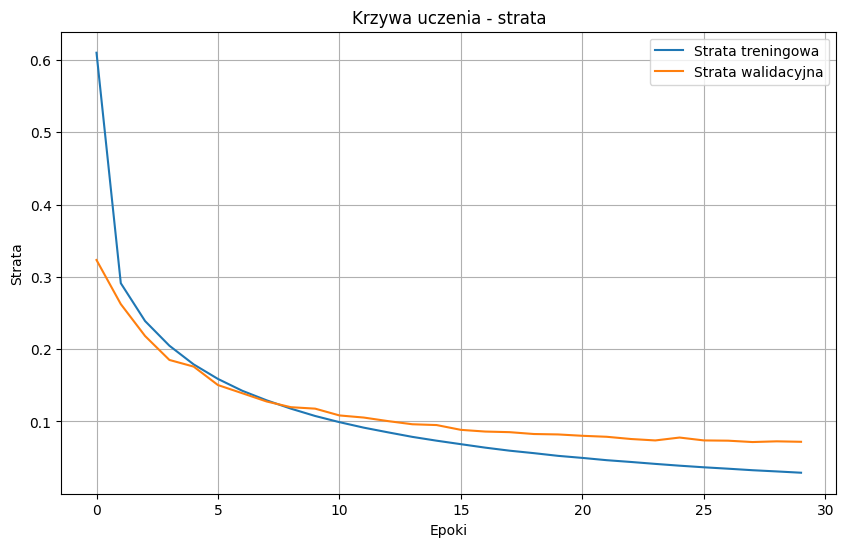

In [43]:
import matplotlib.pyplot as plt

# Rysowanie krzywej dokładności
plt.figure(figsize=(10, 6))
plt.plot(history_mlp.history["accuracy"], label="Dokładność treningowa")
plt.plot(history_mlp.history["val_accuracy"], label="Dokładność walidacyjna")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.title("Krzywa uczenia - dokładność")
plt.legend()
plt.grid(True)
plt.show()

# Rysowanie krzywej straty
plt.figure(figsize=(10, 6))
plt.plot(history_mlp.history["loss"], label="Strata treningowa")
plt.plot(history_mlp.history["val_loss"], label="Strata walidacyjna")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.title("Krzywa uczenia - strata")
plt.legend()
plt.grid(True)
plt.show()

## Zapisanie modelu na dysku - pickle

In [8]:
import pickle

# Zapisz model do pliku
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(model_mlp, file)

## Wczytanie modelu - pickle

In [2]:
# Wczytaj model z pliku
import pickle

with open('mlp_model.pkl', 'rb') as file:
    mlp_loaded = pickle.load(file)



## Użycie wczytanego modelu 

In [7]:
img = [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,  253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,  253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,  253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,  205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,  190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,  253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,  241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,  148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,  253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,  253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,  195, 80,  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]

In [52]:
img_vector = np.array(img).reshape(1, 28 * 28).astype('float32') / 255

predicted_label = mlp_loaded.predict(img_vector)
print(f"Predykcja dla podanego obrazka: {predicted_label[0]}")





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predykcja dla podanego obrazka: [1.99623496e-09 7.68863373e-09 9.72689591e-08 7.86582567e-03
 1.18789061e-14 9.92133200e-01 1.31183606e-11 1.48418045e-09
 2.26155699e-08 9.21209107e-07]


## Błędnie zaklasyfikowane

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


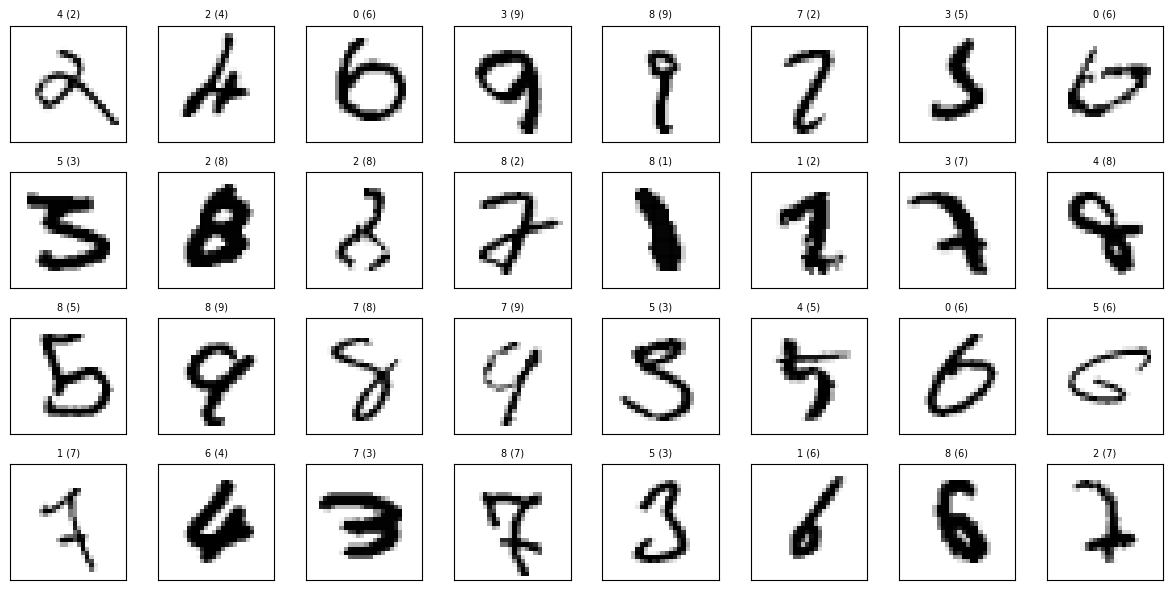

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Compute predictions on the test data
y_pred = model_mlp.predict(x_test_mlp)
y_pred_labels = np.argmax(y_pred, axis=1)

# Identify misclassified samples
incorrect_indices = np.where(y_pred_labels != y_test)[0]

# Number of examples to display
num_examples = 32

# Create subplots
fig, axs = plt.subplots(4, 8, figsize=(12, 6))

# Display misclassified images
for i, ax in enumerate(axs.flat[:num_examples]):
    idx = incorrect_indices[i]
    # Reshape the image back to 28x28 for displaying
    ax.imshow(x_test_mlp[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"{y_pred_labels[idx]} ({y_test[idx]})", fontsize=7)
    ax.set_xticks([])  # Hide X-axis ticks
    ax.set_yticks([])  # Hide Y-axis ticks

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Wykresy architektury - na później

In [ ]:
# ! pip install pydot
# !pip install pydot graphviz

from tensorflow.keras.utils import plot_model

# Zapisz model w formacie Keras (HDF5)
model_mlp.save('mlp_model.keras')

model_mlp.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


# Wczytaj model (jeśli jest w formacie Keras)
from tensorflow.keras.models import load_model
mlp_loaded = tf.keras.models.load_model('mlp_model.keras')

# Twórz obraz modelu
plot_model(mlp_loaded, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


FileNotFoundError: [Errno 2] No such file or directory: 'model_architecture.png'

# Model CNN

## Import danych

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Załaduj dane MNIST
mnist = tf.keras.datasets.mnist

# Załaduj dane MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Konwersja do przedziału [0; 1)
x_train_cnn = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test_cnn = x_test.reshape((10000, 28 * 28)).astype('float32') / 255
x_train_cnn = x_train.reshape((60000, 28 * 28)).astype('float32') / 255


# Przycięcie danych treningowych i utworzenie zbioru walidacyjnego
x_train_cnn, y_train_cnn = x_train_cnn[:-5000], y_train[:-5000]
x_valid_cnn, y_valid_cnn = x_train_cnn[-5000:], y_train[-5000:]

# Przycięcie zbioru testowego
y_train_mlp = y_train[:-5000]

# Sprawdź rozmiary zbiorów danych
print(f"{x_train_cnn.shape=}, {x_valid_cnn.shape=}")
print(f"{x_valid_cnn.shape=}, {x_valid_cnn.shape=}")
print(f"{x_test_cnn.shape=}, {x_test_cnn.shape=}")

x_train_cnn.shape=(55000, 784), x_valid_cnn.shape=(5000, 784)
x_valid_cnn.shape=(5000, 784), x_valid_cnn.shape=(5000, 784)
x_test_cnn.shape=(10000, 784), x_test_cnn.shape=(10000, 784)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

x_train_cnn = x_train_cnn.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_valid_cnn = x_valid_cnn.reshape(-1, 28, 28, 1).astype('float32') / 255.0


model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Trening modelu
history_cnn = model_cnn.fit(
    x_train_cnn,  # Dane treningowe (wejścia)
    y_train_cnn,  # Etykiety treningowe
    epochs=30,  # Liczba epok
    validation_data=(x_valid_cnn, y_valid_cnn)  # Dane walidacyjne (wejścia i etykiety)
)


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1112 - loss: 2.3018 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1122 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3018
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1109 - loss: 2.3015 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1153 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1144 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3017
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1126 - loss: 2.3015 - val_accuracy: 0.1060 - val_loss: 2.3019
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1132 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1129 - loss: 2.3012 - val

## Dokładność modelu - krzywa uczenia

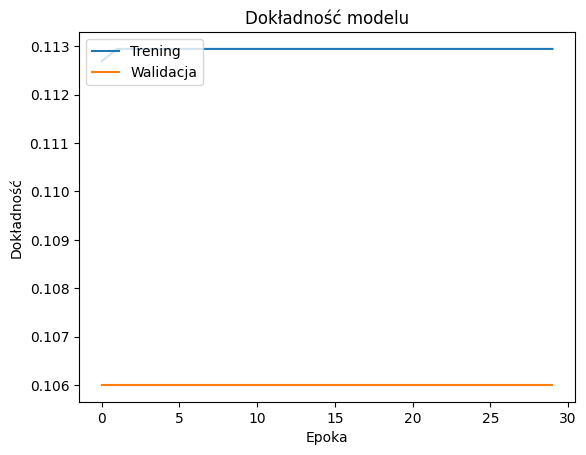

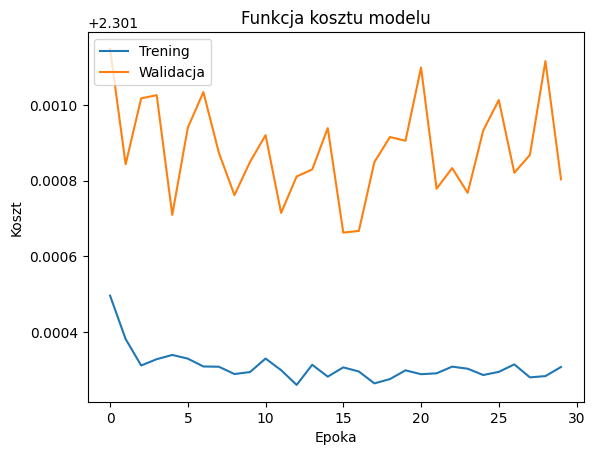

In [3]:
import matplotlib.pyplot as plt

# Wykres dokładności
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

# Wykres funkcji kosztu
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Funkcja kosztu modelu')
plt.ylabel('Koszt')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()


## Zapis do i odczyt z pliku - CNN

In [13]:
import pickle

# Zapisz model do pliku
with open('model_cnn.pkl', 'wb') as file:
    pickle.dump(model_cnn, file)

In [14]:
with open('model_cnn.pkl', 'rb') as file:
    model_cnn = pickle.load(file)

# Model CNN - deep learning z TensorFlow i Keras

## Import danych

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# załadowanie zbioru MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# zliczenie liczby etykiet
num_labels = len(np.unique(y_train))
# konwersja na wektor „jeden-aktywny” (OH)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# wymiary obrazów wejściowych
image_size = x_train.shape[1]

# zmiana rozmiaru i normalizacja
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Tworzenie modelu

In [3]:
# parametry sieci
# obraz jest przetwarzany "tak-jak-jest" (kwadrat, skala szarości)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2
# model jest stosem warstw CNN-ReLU-MaxPooling
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu',
input_shape=input_shape))
model_cnn.add(MaxPooling2D(pool_size))
model_cnn.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu'))
model_cnn.add(MaxPooling2D(pool_size))
model_cnn.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu'))
model_cnn.add(Flatten())
# pomijanie jako regularyzacja
model_cnn.add(Dropout(dropout))
# warstwa wyjściowa jest 10-wymiarowym wektorem OH
model_cnn.add(Dense(num_labels))
model_cnn.add(Activation('softmax'))
model_cnn.summary()
# plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

## Odpalenie modelu

In [6]:
# funkcja straty dla wektora OH, optymalizator Adam
# dokładność jest odpowiednią miarą do oceny jakości klasyfikatora
model_cnn.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
# trenowanie sieci
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model_cnn.evaluate(x_test,
y_test,
batch_size=batch_size,
verbose=0)
print("\nDokładność na zbiorze testowym: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8210 - loss: 0.5864
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9782 - loss: 0.0697
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9839 - loss: 0.0536
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9882 - loss: 0.0377
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9900 - loss: 0.0304
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9907 - loss: 0.0281
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9925 - loss: 0.0232
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9938 - loss: 0.0191
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9940 - loss: 0.0180
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9935 - loss: 0.0180

Dokładność na zbiorze testowym: 99.3%


## Eksport modelu

In [14]:
import pickle

# Zapisz model do pliku
with open('model_cnn.pkl', 'wb') as file:
    pickle.dump(model_cnn, file)

## Import modelu

In [9]:
# Wczytaj model z pliku
import pickle

with open('model_cnn.pkl', 'rb') as file:
    loaded_cnn = pickle.load(file)

In [10]:
img = [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,  253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,  253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,  253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,  205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,  190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,  253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,  241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,  0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,  148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,  253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,  253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,  195, 80,  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]

In [13]:
img_vector = np.array(img).reshape(1, 28, 28).astype('float32') / 255

predicted_label = loaded_cnn.predict(img_vector)
print(f"Predykcja dla podanego obrazka: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predykcja dla podanego obrazka: [2.8979267e-14 6.9891812e-09 1.3961287e-12 6.3823217e-01 1.1919534e-12
 3.6176682e-01 3.5459833e-11 3.9110321e-12 9.7675252e-07 5.0301765e-08]
